# yfinance Library Assignment  

In [5]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Function Specification: `download_historical_data`

Implement the function `download_historical_data` to fetch historical price data using Yahoo Finance as the data source. This function should be capable of fetching historical data for a specified stock symbol between given start and end dates. Additionally, it should support an optional parameter for the data timeframe with a default value of `'1d'` (daily).

---

### Function Specifications

**Parameters:**
- `symbol`: The ticker symbol of the stock (e.g., `'RELIANCE.NS'`).
- `start_date`: Start date for the data in `'YYYY-MM-DD'` format.
- `end_date`: End date for the data in `'YYYY-MM-DD'` format.
- `timeframe`: The frequency of the data (`'1d'`, `'1wk'`, `'1mo'`), default is `'1d'`.

**Return:**  
A pandas `DataFrame` containing the fetched data.


### Visualization

Create a function for plotting the stock closing prices. This function should accept parameters for the plot and its objective is to display the graph.
   


In [7]:
def plot_stock_closing_prices(data, title="Stock Closing Prices", xlabel="Date", ylabel="Closing Price", figsize=(12, 6), line_style='-'):
    if 'Close' not in data.columns:
        raise ValueError("The DataFrame must contain a 'Close' column.")

    plt.figure(figsize=figsize)
    plt.plot(data.index, data['Close'], line_style, label="Closing Price", color="blue")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

### Run the functions 

**Choose Stocks:**  
   - Select any three stocks of your choice.
   - Fetch their data for the time period from **2012 to 2022**.
   - Select daily time frame i.e. 1d.

**Plot the Data:**  
   1. Plot the data for each stock separately.  
   2. Combine the data and plot all three stocks on the **same graph** for comparison.

[*********************100%***********************]  1 of 1 completed


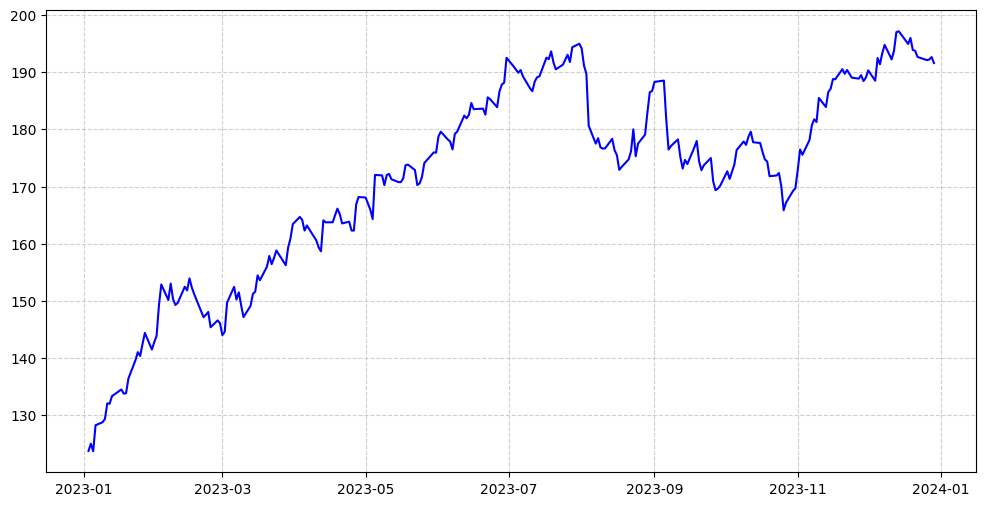

In [8]:
if __name__ == "__main__":
    stock_data = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
    plot_stock_closing_prices(stock_data, title="Apple Stock Closing Prices (2023)", xlabel="Date", ylabel="Price (USD)")
                    

### Technical Analysis 

**Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)**  
   - Plot the SMA and EMA of 5 days of each of the three stocks that you have selected.
   - SMA and EMA graph should be plotted on the same graph 
   - Hence you have to plot three graphs of each stock with SMA and EMA
    

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_sma(data, window=5):
    return data['Close'].rolling(window=window).mean()

def calculate_ema(data, window=5):
    return data['Close'].ewm(span=window, adjust=False).mean()

def plot_sma_ema(data, stock_name, window=5):
    sma = calculate_sma(data, window)
    ema = calculate_ema(data, window)
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Closing Price', color='blue', alpha=0.5)
    plt.plot(data.index, sma, label=f'{window}-Day SMA', color='green')
    plt.plot(data.index, ema, label=f'{window}-Day EMA', color='red')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

**MACD**  
   - Plot MACD and Signal line for each of the three stocks.
   - Fast Length (Short-term EMA): 12 periods
   - Slow Length (Long-term EMA): 26 periods
   - Signal Line (Smoothing EMA): 9 periods

    

[*********************100%***********************]  1 of 1 completed


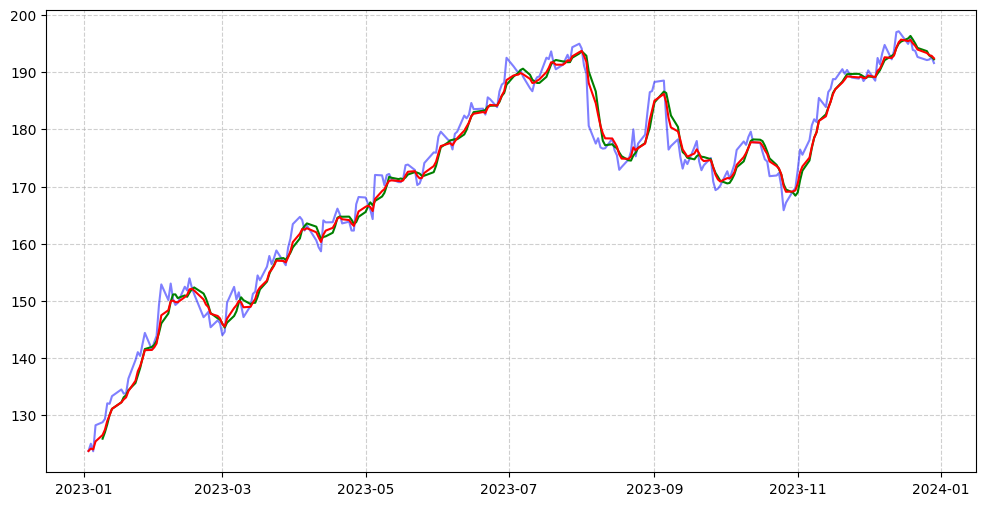

[*********************100%***********************]  1 of 1 completed


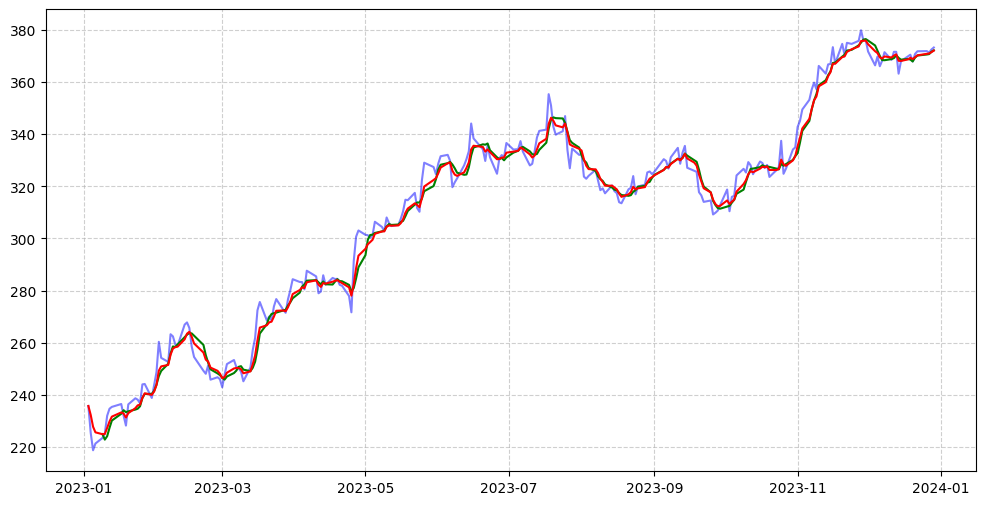

[*********************100%***********************]  1 of 1 completed


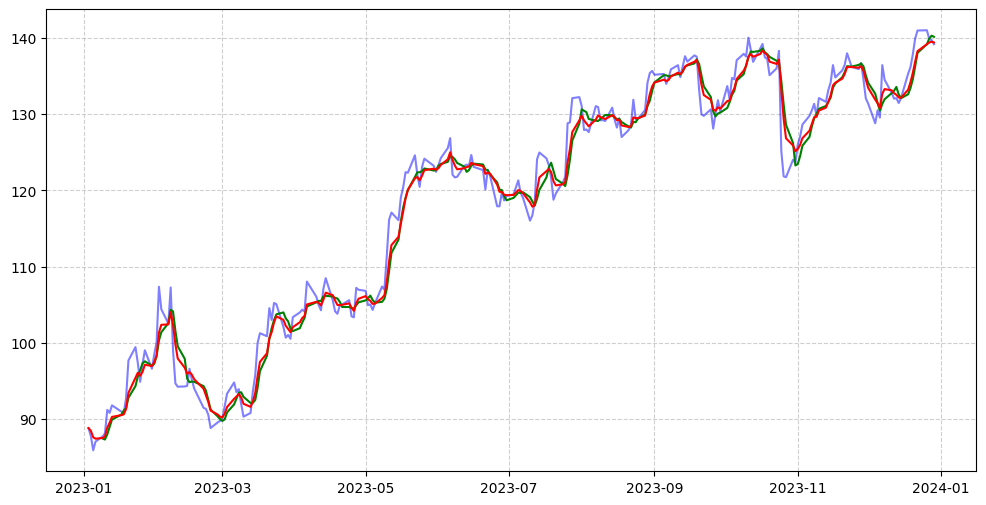

In [10]:
 if __name__ == "__main__":
    stock_symbols = ["AAPL", "MSFT", "GOOGL"]
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    window_size = 5
    for symbol in stock_symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        plot_sma_ema(stock_data, stock_name=symbol, window=window_size)
  

**RSI**  
   - Plot RSI for each of the three stocks
   - Period = 14 days 
   - Also show the overbought and oversold regions 
   - Overbought condition: RSI above 70
   - Oversold condition: RSI below 30
   
    

[*********************100%***********************]  1 of 1 completed


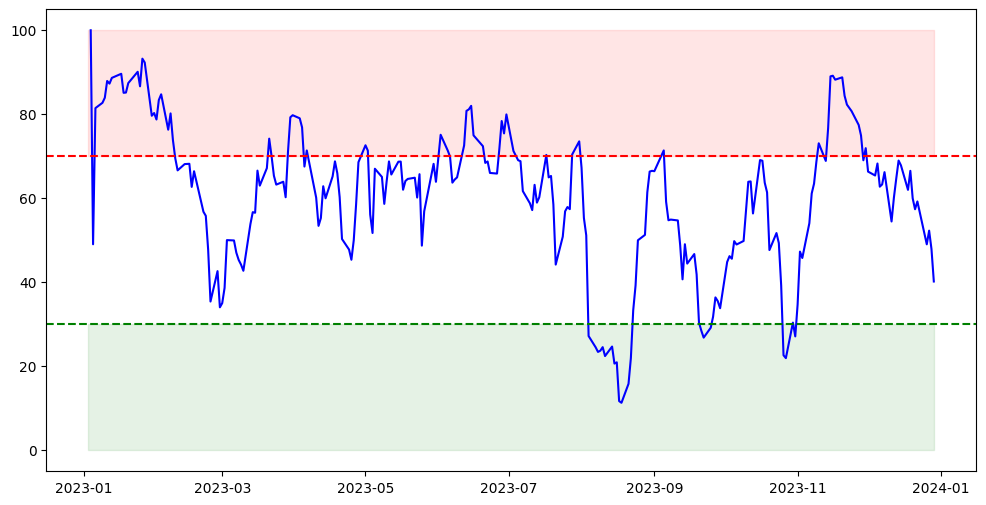

[*********************100%***********************]  1 of 1 completed


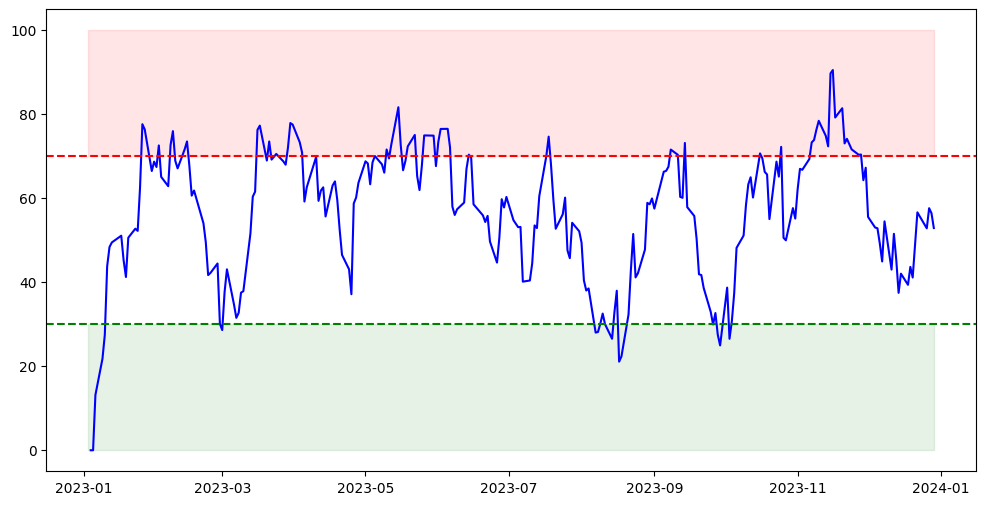

[*********************100%***********************]  1 of 1 completed


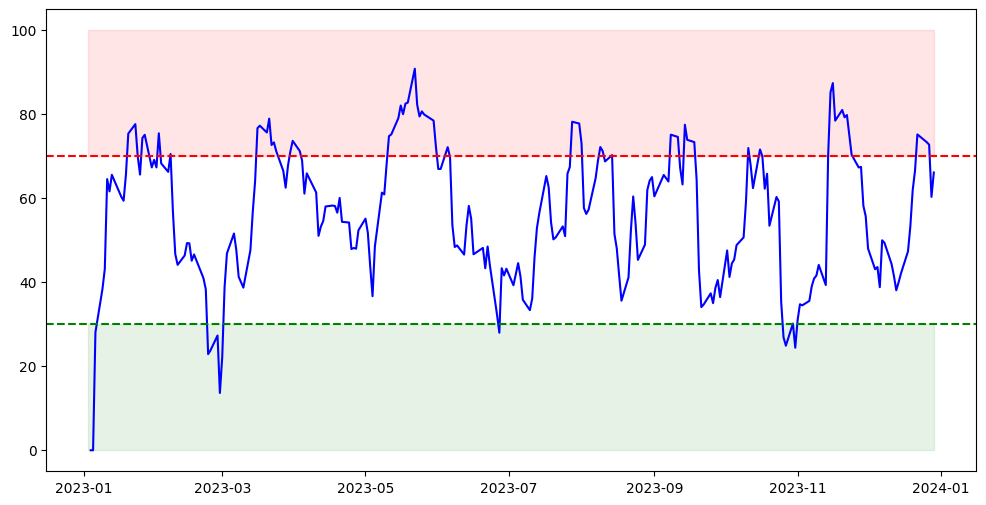

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)   
    gain = delta.where(delta > 0, 0)  
    loss = -delta.where(delta < 0, 0)  

   
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def plot_rsi(data, stock_name, period=14):
    rsi = calculate_rsi(data, period)

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, rsi, label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.fill_between(data.index, 70, 100, color='red', alpha=0.1)  
    plt.fill_between(data.index, 0, 30, color='green', alpha=0.1)  
    plt.show()

 
if __name__ == "__main__":
    stock_symbols = ["AAPL", "MSFT", "GOOGL"]
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    for symbol in stock_symbols:
        stock_data = yf.download(symbol, start=start_date, end=end_date)
        plot_rsi(stock_data, stock_name=symbol, period=14)


### Summarize your analysis

In [12]:
""" The Relative Strength Index (RSI) measures the speed and magnitude of price changes to identify overbought (RSI > 70) and oversold (RSI < 30) conditions. By analyzing the RSI of three stocks, we observed that high RSI values often corresponded with price peaks, while low values indicated price dips."""

' The Relative Strength Index (RSI) measures the speed and magnitude of price changes to identify overbought (RSI > 70) and oversold (RSI < 30) conditions. By analyzing the RSI of three stocks, we observed that high RSI values often corresponded with price peaks, while low values indicated price dips.'